Data Cleaning and Processing

In [511]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

In [512]:
df =pd.read_csv("usa_mercedes_benz_prices.csv")
pd.set_option('display.max_rows', 100)
df.dropna(inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 0 to 2428
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2135 non-null   object 
 1   Mileage       2135 non-null   object 
 2   Rating        2135 non-null   float64
 3   Review Count  2135 non-null   object 
 4   Price         2135 non-null   object 
dtypes: float64(1), object(4)
memory usage: 100.1+ KB


,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"
...,...,...,...,...,...
2423,2020 Mercedes-Benz AMG GT 53 Base,"36,814 mi.",4.7,"1,424","$75,577"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.8,"1,758","$53,983"


In [513]:
df['Name'] = df['Name'].apply(lambda x: x.lower())
df['Year'] = df['Name'].str.split().str.get(0)


In [514]:
# Remove 'mi.' from mileage column
df['Mileage'] = df['Mileage'].str.replace(' mi.', '')
# Remove '$' from Price column
df['Price'] = df['Price'].str.replace('$', '')
# Remove , from numbers
df['Mileage'] = df['Mileage'].str.replace(',', '')
df['Review Count'] = df['Review Count'].str.replace(',', '')
df['Price'] = df['Price'].str.replace(',', '')
df

,Name,Mileage,Rating,Review Count,Price,Year
0,2021 mercedes-benz a-class a 220 4matic,29636,3.9,1800,30900,2021
1,2022 mercedes-benz amg sl 63 base,5540,4.7,1239,139999,2022
2,2022 mercedes-benz amg sl 63 base,4890,4.7,1239,132999,2022
3,2020 mercedes-benz amg e 53 base 4matic,29746,4.8,752,58587,2020
4,2021 mercedes-benz amg gls 63 base 4matic,32631,5.0,1502,95990,2021
...,...,...,...,...,...,...
2423,2020 mercedes-benz amg gt 53 base,36814,4.7,1424,75577,2020
2425,2022 mercedes-benz s-class 4matic,11395,4.5,1334,89599,2022
2426,2021 mercedes-benz glb 250 base 4matic,30392,4.9,2375,32890,2021
2427,2023 mercedes-benz e-class e 450 4matic,3413,4.8,1758,53983,2023


In [515]:
df['AMG'] = df['Name'].str.contains('amg')
df['4MATIC'] = df['Name'].str.contains('4matic')

In [516]:
test = df['Name'].str.replace("amg","").str.split().str[2]
test = pd.DataFrame(test)
test
df['Model'] = test
df
##df

,Name,Mileage,Rating,Review Count,Price,Year,AMG,4MATIC,Model
0,2021 mercedes-benz a-class a 220 4matic,29636,3.9,1800,30900,2021,False,True,a-class
1,2022 mercedes-benz amg sl 63 base,5540,4.7,1239,139999,2022,True,False,sl
2,2022 mercedes-benz amg sl 63 base,4890,4.7,1239,132999,2022,True,False,sl
3,2020 mercedes-benz amg e 53 base 4matic,29746,4.8,752,58587,2020,True,True,e
4,2021 mercedes-benz amg gls 63 base 4matic,32631,5.0,1502,95990,2021,True,True,gls
...,...,...,...,...,...,...,...,...,...
2423,2020 mercedes-benz amg gt 53 base,36814,4.7,1424,75577,2020,True,False,gt
2425,2022 mercedes-benz s-class 4matic,11395,4.5,1334,89599,2022,False,True,s-class
2426,2021 mercedes-benz glb 250 base 4matic,30392,4.9,2375,32890,2021,False,True,glb
2427,2023 mercedes-benz e-class e 450 4matic,3413,4.8,1758,53983,2023,False,True,e-class


In [517]:
df =df.drop(['Name'],axis=1)

In [518]:
df

,Mileage,Rating,Review Count,Price,Year,AMG,4MATIC,Model
0,29636,3.9,1800,30900,2021,False,True,a-class
1,5540,4.7,1239,139999,2022,True,False,sl
2,4890,4.7,1239,132999,2022,True,False,sl
3,29746,4.8,752,58587,2020,True,True,e
4,32631,5.0,1502,95990,2021,True,True,gls
...,...,...,...,...,...,...,...,...
2423,36814,4.7,1424,75577,2020,True,False,gt
2425,11395,4.5,1334,89599,2022,False,True,s-class
2426,30392,4.9,2375,32890,2021,False,True,glb
2427,3413,4.8,1758,53983,2023,False,True,e-class


In [519]:
uniquePrice = df['Price'].unique()
UniPriceList = uniquePrice.tolist()
print(UniPriceList)
df['Price'] = df['Price'].replace('Not Priced', np.nan)
df.dropna(inplace=True)

['30900', '139999', '132999', '58587', '95990', '74999', '130999', '55995', '71999', '62975', '82895', '50226', '22495', '63998', '65024', '69771', '51995', '57877', '53977', '22498', '67800', '42595', '74788', '58770', '53690', '46900', '38996', '69306', '39442', '112749', '57900', '49995', '153722', '43855', '74887', '59413', '68983', '46300', '62421', '198000', '36900', '62292', '50299', '98984', '77700', '143554', '54000', '57463', '84997', '74377', '49913', '21082', '161775', '79711', '48500', '50900', '54018', '38963', '107552', '50595', '47562', '95981', '98555', '57445', '94995', '43105', '55998', '33497', '177595', '69998', '120997', '48000', '73998', '69997', '157500', '45705', '114750', '41948', '99805', '67910', '60312', '58997', '35824', '86690', '60994', '53922', '67585', '56940', '62704', '209995', '55000', '41690', '44744', '65999', '49983', '87390', '111326', '68500', '33999', '31293', '99999', '78900', '36880', '42499', '20999', '74988', '26540', '94984', '86975', '77

In [520]:
df['Year'] = df['Year'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Review Count'] = df['Review Count'].astype(float)


In [521]:
print(df.dtypes)

Mileage         float64
Rating          float64
Review Count    float64
Price           float64
Year            float64
AMG                bool
4MATIC             bool
Model            object
dtype: object


In [522]:
df['LogPrice'] = np.log(df['Price'])
df['LogMile'] = np.log(df['Mileage'])

Data Display

array([[<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Review Count'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'LogPrice'}>],
       [<Axes: title={'center': 'LogMile'}>, <Axes: >, <Axes: >]],
      dtype=object)

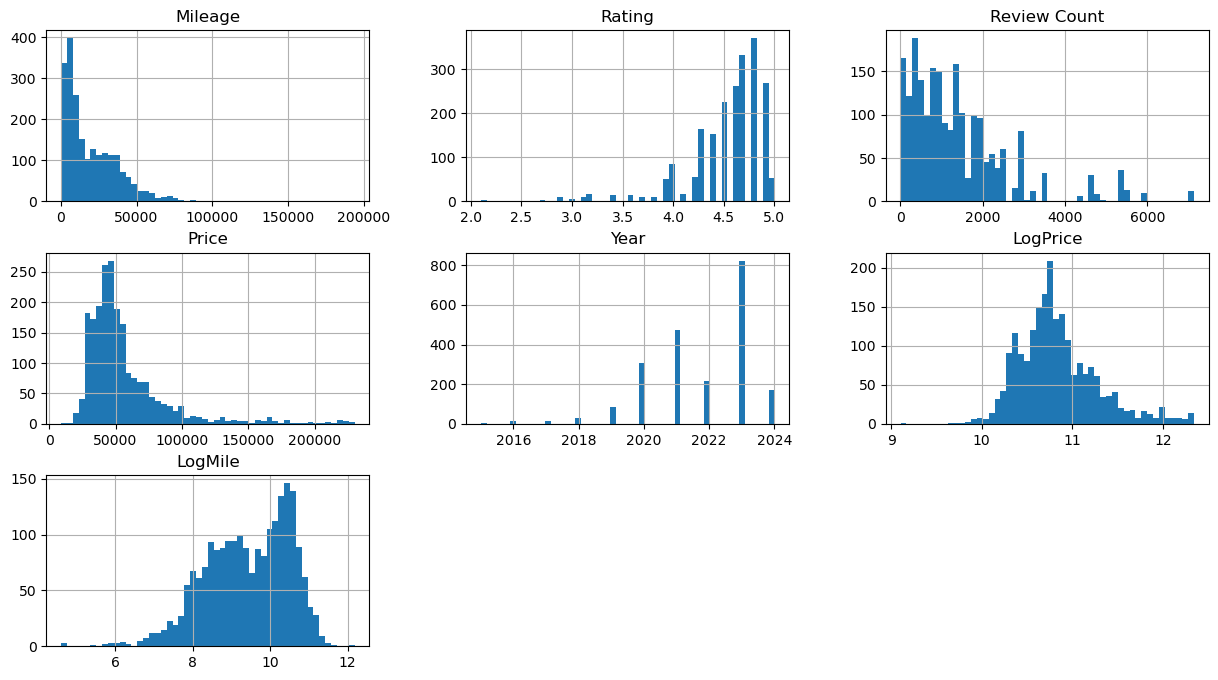

In [523]:
df.hist(figsize=(15, 8),bins = 50)

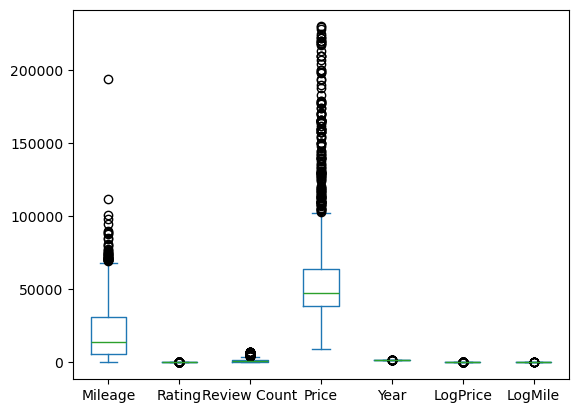

In [524]:
df.plot(kind = 'box')
plt.show()

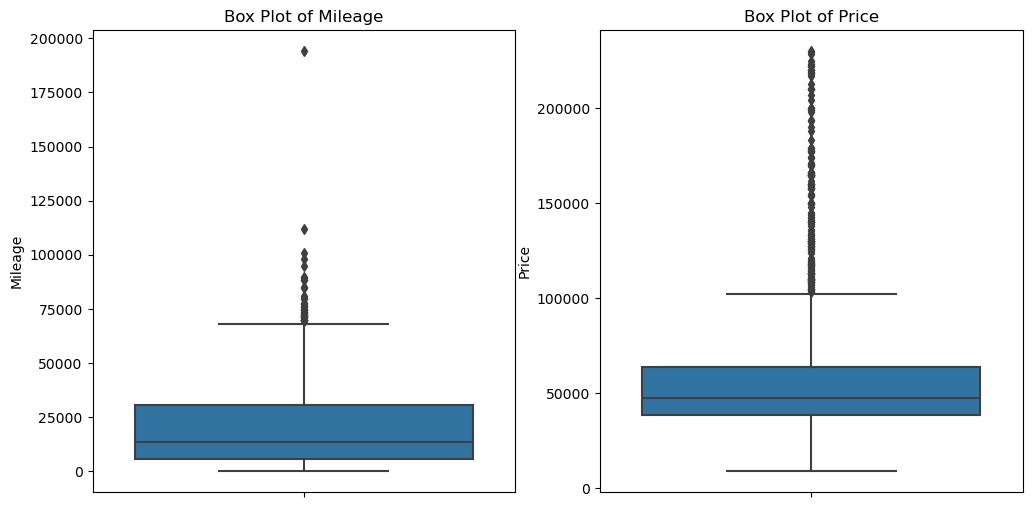

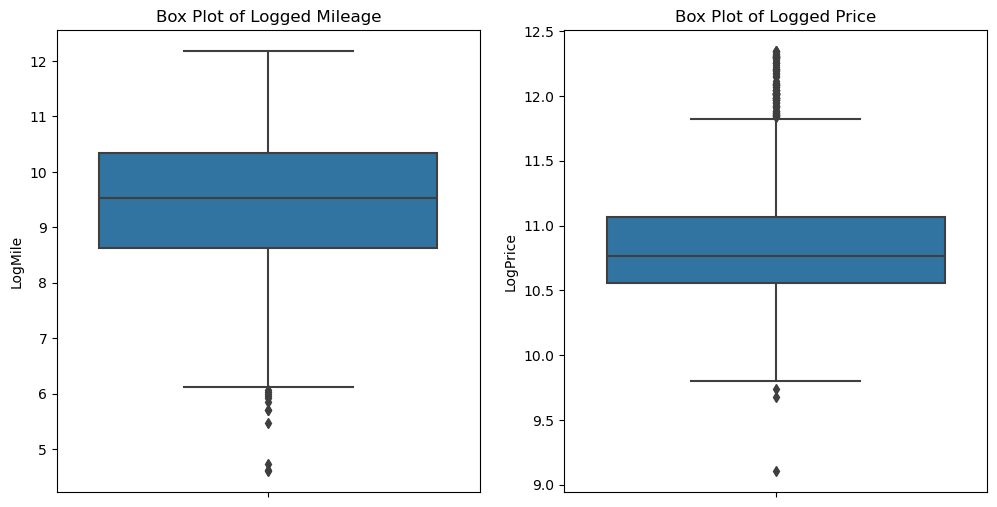

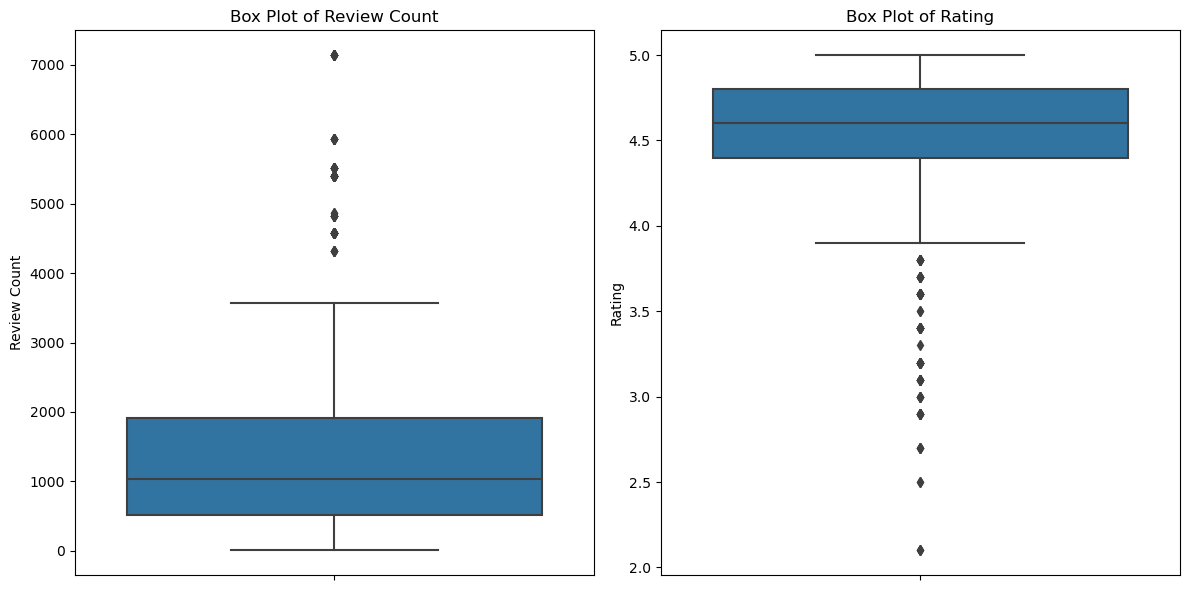

In [525]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Mileage', data=df)
plt.title('Box Plot of Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='Price', data=df)
plt.title('Box Plot of Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='LogMile', data=df)
plt.title('Box Plot of Logged Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='LogPrice', data=df)
plt.title('Box Plot of Logged Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Review Count', data=df)
plt.title('Box Plot of Review Count')

plt.subplot(1, 2, 2)
sns.boxplot(y='Rating', data=df)
plt.title('Box Plot of Rating')

plt.tight_layout()
plt.show()

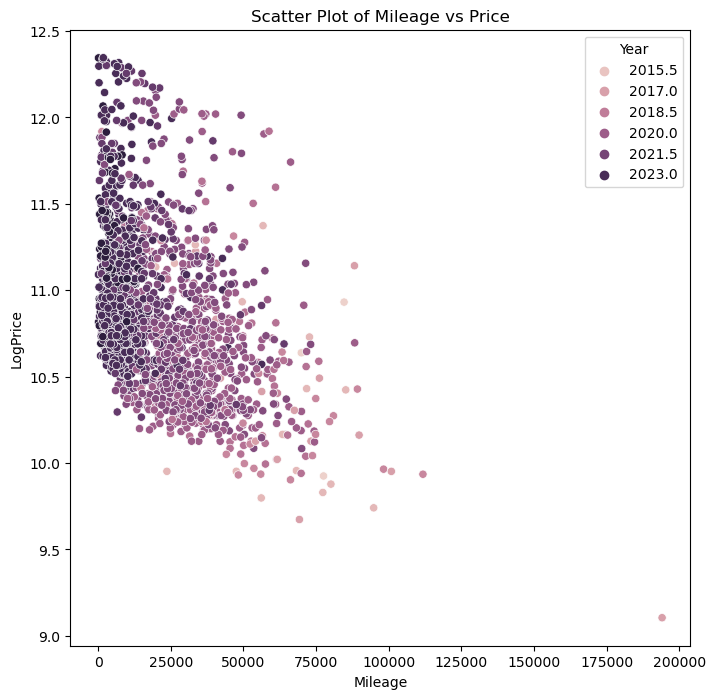

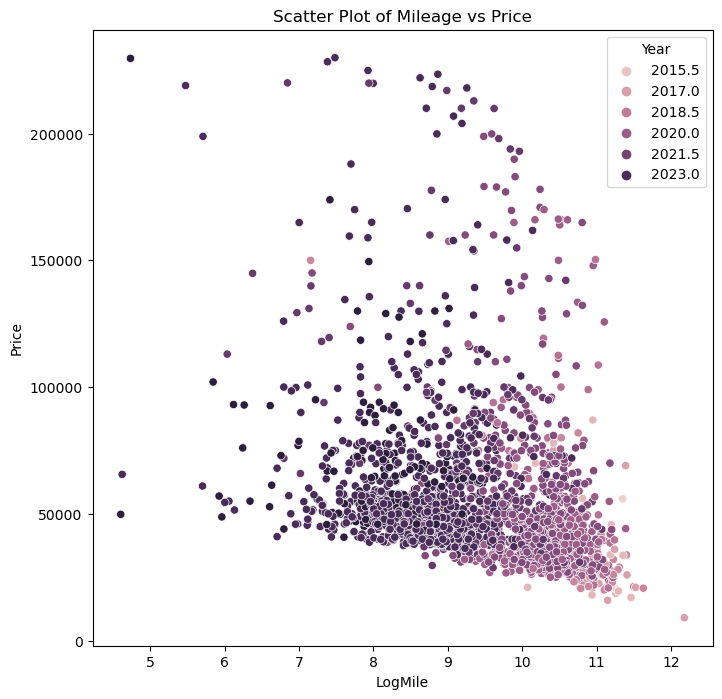

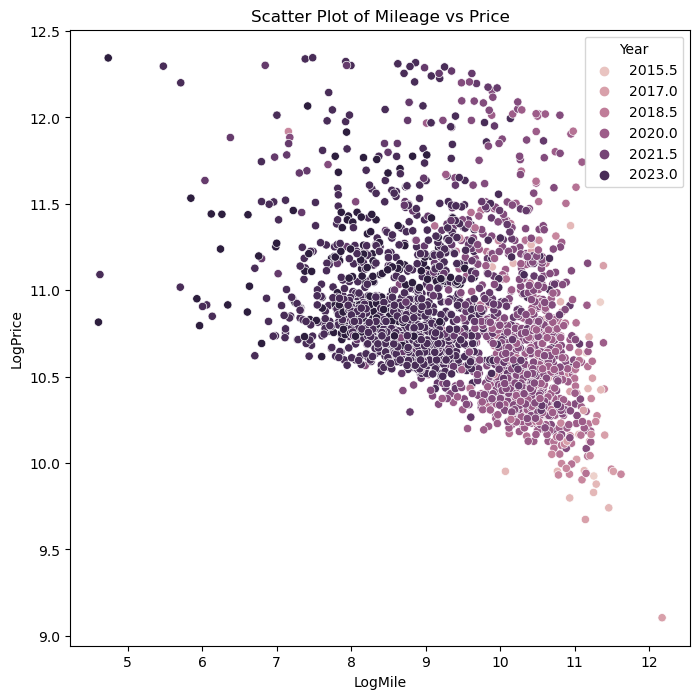

In [526]:
# Scatter Plot

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Mileage', y= 'LogPrice', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='LogMile', y= 'Price', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='LogMile', y= 'LogPrice', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.show()

We notice a clear negative correlation with mileage and price after logging both values. We shall continue this study with logged values.

In [527]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2134 entries, 0 to 2428
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mileage       2134 non-null   float64
 1   Rating        2134 non-null   float64
 2   Review Count  2134 non-null   float64
 3   Price         2134 non-null   float64
 4   Year          2134 non-null   float64
 5   AMG           2134 non-null   bool   
 6   4MATIC        2134 non-null   bool   
 7   Model         2134 non-null   object 
 8   LogPrice      2134 non-null   float64
 9   LogMile       2134 non-null   float64
dtypes: bool(2), float64(7), object(1)
memory usage: 154.2+ KB


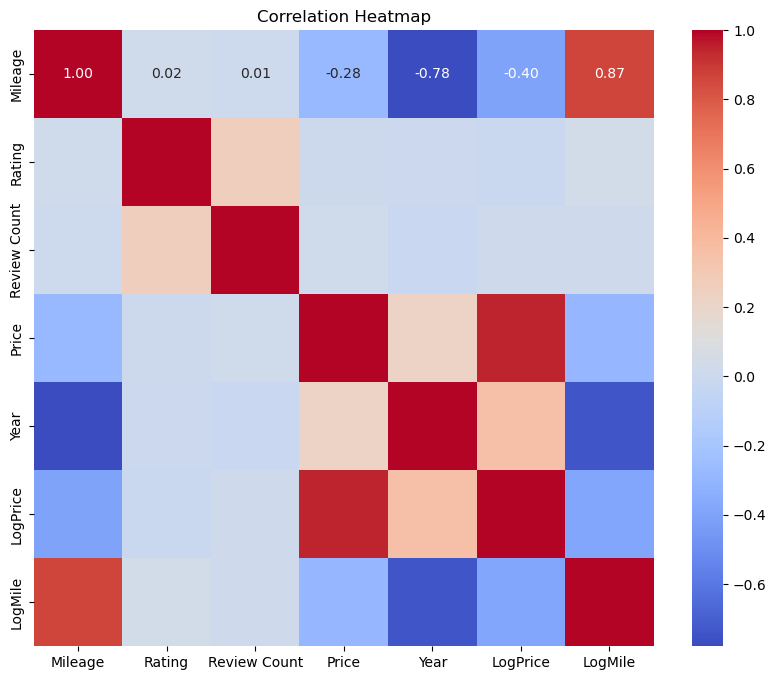

In [528]:
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes('float64')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

Clean out the Outliers

In [529]:
def remove_outliers(df):
    df_cleaned = df.copy()

    for col in df_cleaned.select_dtypes(include='number').columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        df_cleaned = df_cleaned[~outliers]
    
    return df_cleaned

In [530]:
df = remove_outliers(df)

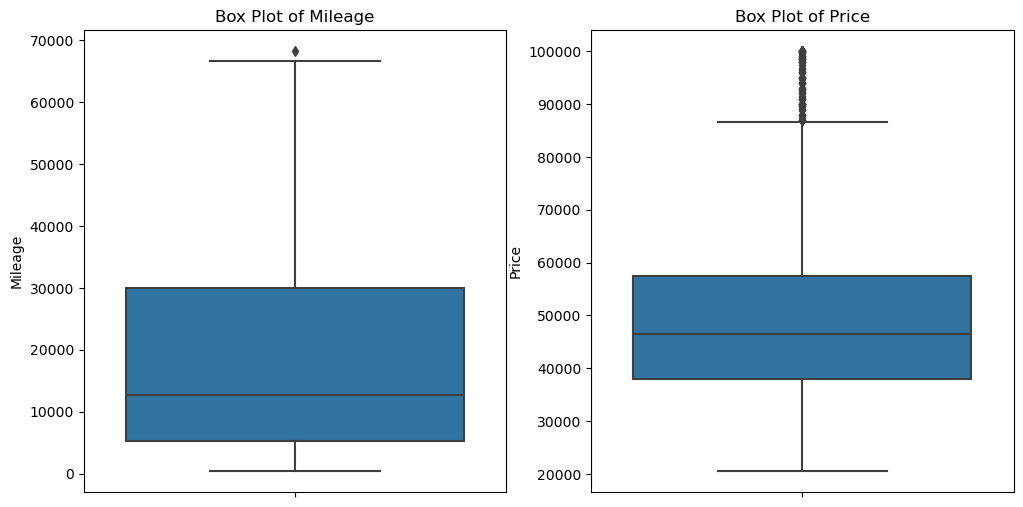

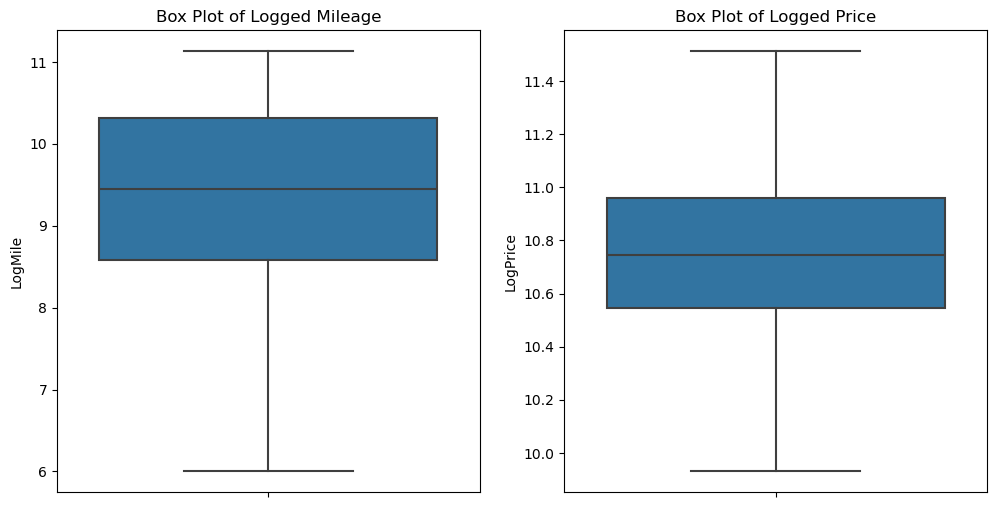

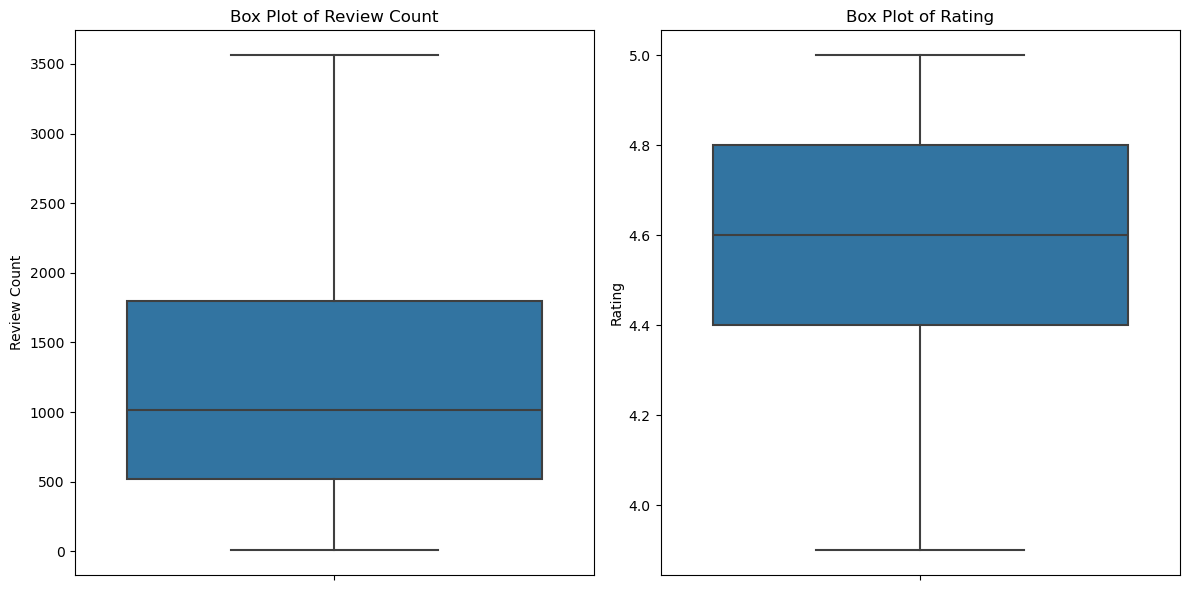

In [531]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Mileage', data=df)
plt.title('Box Plot of Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='Price', data=df)
plt.title('Box Plot of Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='LogMile', data=df)
plt.title('Box Plot of Logged Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='LogPrice', data=df)
plt.title('Box Plot of Logged Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Review Count', data=df)
plt.title('Box Plot of Review Count')

plt.subplot(1, 2, 2)
sns.boxplot(y='Rating', data=df)
plt.title('Box Plot of Rating')

plt.tight_layout()
plt.show()

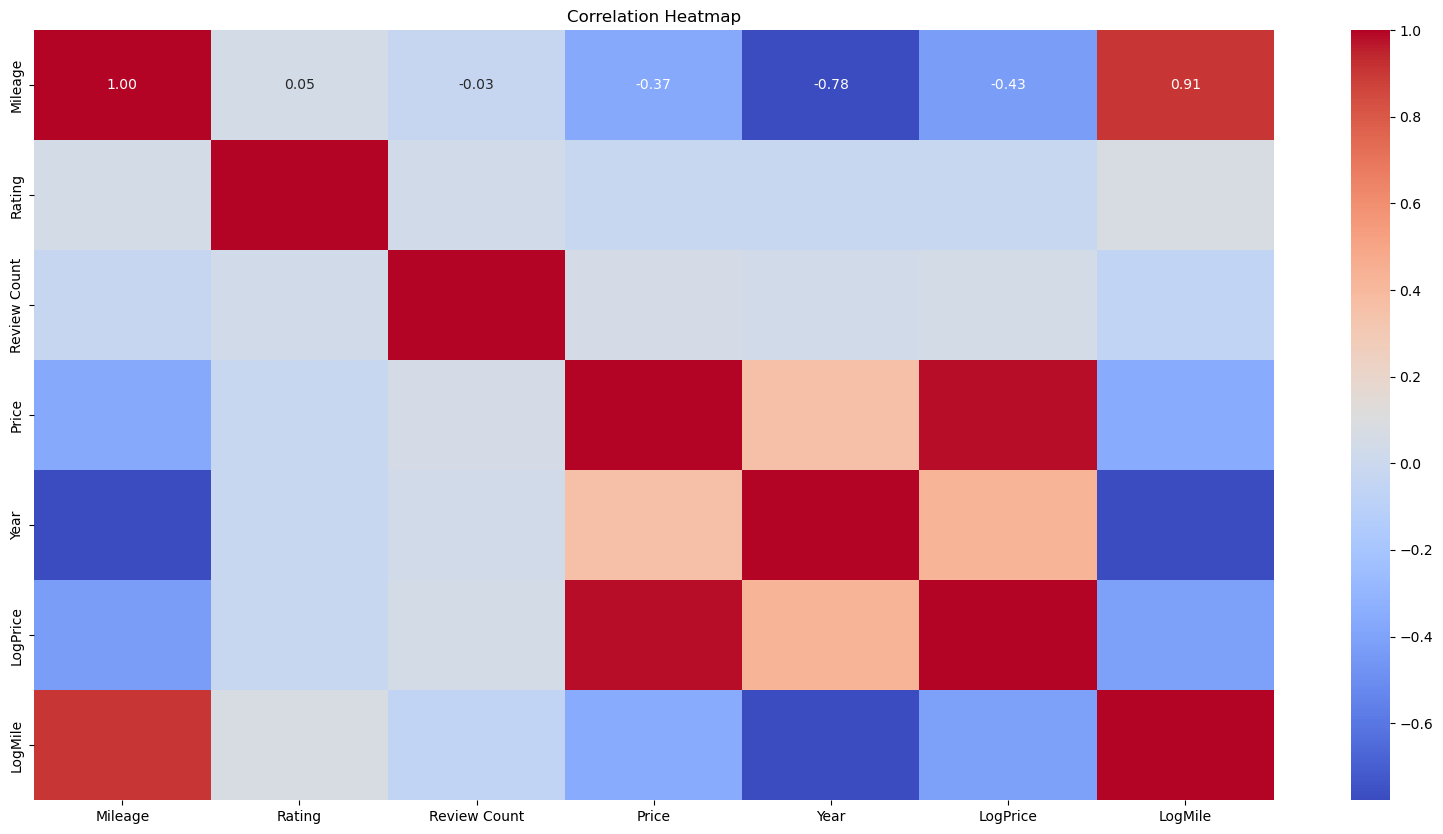

In [532]:
plt.figure(figsize=(20, 10))
num_cols = df.select_dtypes('float64')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

In [533]:
from sklearn.preprocessing import LabelEncoder
 

Lbl=LabelEncoder()
df.Model=Lbl.fit_transform(df.Model)
df.dropna(inplace=True)
print(df)

      Mileage  Rating  Review Count    Price    Year    AMG  4MATIC  Model  \
0     29636.0     3.9        1800.0  30900.0  2021.0  False    True      1   
3     29746.0     4.8         752.0  58587.0  2020.0   True    True      6   
4     32631.0     5.0        1502.0  95990.0  2021.0   True    True     16   
5      3573.0     4.7        1239.0  74999.0  2022.0   True    True      6   
8     15755.0     4.8         902.0  71999.0  2021.0   True   False     17   
...       ...     ...           ...      ...     ...    ...     ...    ...   
2423  36814.0     4.7        1424.0  75577.0  2020.0   True   False     17   
2425  11395.0     4.5        1334.0  89599.0  2022.0  False    True     21   
2426  30392.0     4.9        2375.0  32890.0  2021.0  False    True     13   
2427   3413.0     4.8        1758.0  53983.0  2023.0  False    True      7   
2428   6336.0     4.5        2057.0  46035.0  2023.0  False   False     12   

       LogPrice    LogMile  
0     10.338511  10.296745  
3    

Prediciton

In [534]:
df2 = df.copy()
df = df[['Price','Mileage','Rating','Review Count','Year','Model']]
df.describe()

,Price,Mileage,Rating,Review Count,Year,Model
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,50031.594438,18613.483778,4.577868,1223.741020,2021.902665,10.300116
std,16821.261189,15543.851008,0.265368,860.394126,1.437318,5.234586
min,20562.000000,405.000000,3.900000,7.000000,2018.000000,0.000000
25%,37995.500000,5336.250000,4.400000,522.000000,2021.000000,5.000000
50%,46473.000000,12708.000000,4.600000,1018.000000,2022.000000,12.000000
75%,57499.000000,30016.000000,4.800000,1800.000000,2023.000000,14.000000
max,99999.000000,68208.000000,5.000000,3563.000000,2024.000000,24.000000


In [558]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [560]:
y=df["Price"]
y = y.ravel()
y

array([30900., 58587., 95990., ..., 32890., 53983., 46035.])

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 ,shuffle =True)

In [562]:
reg_moduel=RandomForestRegressor(n_estimators=40,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_40 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_40 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_40)
print("R-squared Score:", r2_40)

Random Forest Regressor Train Score is :  0.9999940403434561
Random Forest Regressor Test Score is :  0.9999699245095113
----------------------------------------------------
Mean Squared Error (MSE): 9123.834767543829
R-squared Score: 0.9999699245095113


In [563]:
reg_moduel=RandomForestRegressor(n_estimators=100,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_100 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_100 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_100)
print("R-squared Score:", r2_100)

Random Forest Regressor Train Score is :  0.9999948160904812
Random Forest Regressor Test Score is :  0.9999718970026908
----------------------------------------------------
Mean Squared Error (MSE): 8525.450449999977
R-squared Score: 0.9999718970026908


In [564]:
reg_moduel=RandomForestRegressor(n_estimators=500,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_500 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_500 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_500)
print("R-squared Score:", r2_500)

Random Forest Regressor Train Score is :  0.999994994298967
Random Forest Regressor Test Score is :  0.9999710679772384
----------------------------------------------------
Mean Squared Error (MSE): 8776.947304175404
R-squared Score: 0.9999710679772384


In [565]:
reg_moduel=RandomForestRegressor(n_estimators=1000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_1000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_1000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_1000)
print("R-squared Score:", r2_1000)

Random Forest Regressor Train Score is :  0.9999952115244938
Random Forest Regressor Test Score is :  0.9999714654208813
----------------------------------------------------
Mean Squared Error (MSE): 8656.377030229798
R-squared Score: 0.9999714654208813


In [579]:
reg_moduel=RandomForestRegressor(n_estimators=2000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_2000 = mean_squared_error(y_test, y_pred)


# Calculate R-squared score
r2_2000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_2000)
print("R-squared Score:", r2_2000)

Random Forest Regressor Train Score is :  0.9999953319197576
Random Forest Regressor Test Score is :  0.9999717764617777
----------------------------------------------------
Mean Squared Error (MSE): 8562.018278360938
R-squared Score: 0.9999717764617777


In [580]:
reg_moduel=RandomForestRegressor(n_estimators=3000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_3000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_3000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_3000)
print("R-squared Score:", r2_3000)

Random Forest Regressor Train Score is :  0.9999952864292929
Random Forest Regressor Test Score is :  0.9999713462868651
----------------------------------------------------
Mean Squared Error (MSE): 8692.518056101382
R-squared Score: 0.9999713462868651


In [566]:
reg_moduel=RandomForestRegressor(n_estimators=10000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_10000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_10000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_10000)
print("R-squared Score:", r2_10000)

Random Forest Regressor Train Score is :  0.9999954348420036
Random Forest Regressor Test Score is :  0.9999720239664109
----------------------------------------------------
Mean Squared Error (MSE): 8486.934170323691
R-squared Score: 0.9999720239664109


In [581]:
data = {'n_estimators': [40, 500, 1000,2000,3000,10000],
        'MSE': [mse_40, mse_500, mse_1000,mse_2000,mse_3000, mse_10000],
        'R2': [r2_40, r2_500, r2_1000,r2_2000,r2_3000,r2_10000]}

In [582]:
result = pd.DataFrame(data)
result

,n_estimators,MSE,R2
0,40,9123.834768,0.999970
1,500,8776.947304,0.999971
2,1000,8656.377030,0.999971
3,2000,8562.018278,0.999972
4,3000,8692.518056,0.999971
5,10000,8486.934170,0.999972


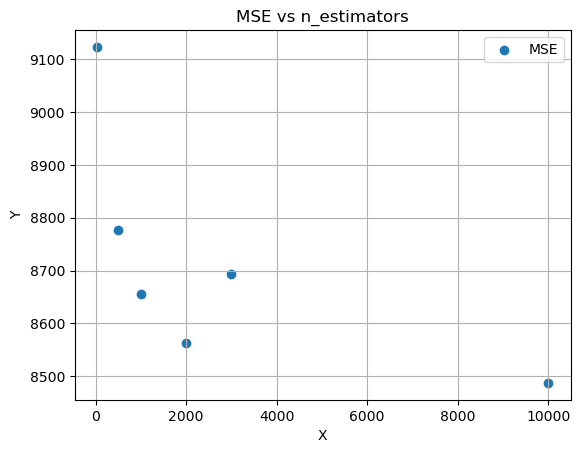

In [586]:
# Fit a line to the data (simple linear regression)

x = result['n_estimators']
y = result['MSE']

coefficients = np.polyfit(x, y, 1)


# Scatter plot
plt.scatter(x, y, label='MSE')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MSE vs n_estimators')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

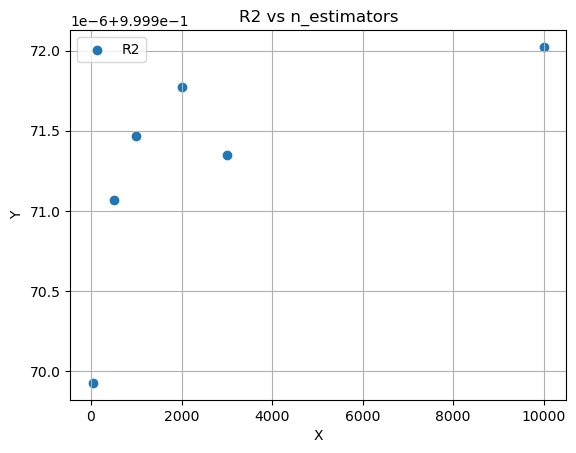

In [587]:
# Fit a line to the data (simple linear regression)

x = result['n_estimators']
y = result['R2']

coefficients = np.polyfit(x, y, 1)


# Scatter plot
plt.scatter(x, y, label='R2')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('R2 vs n_estimators')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Sudden dip in r2 and MSE on 3000, we will use n_estimator of 2000 for the study.